In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

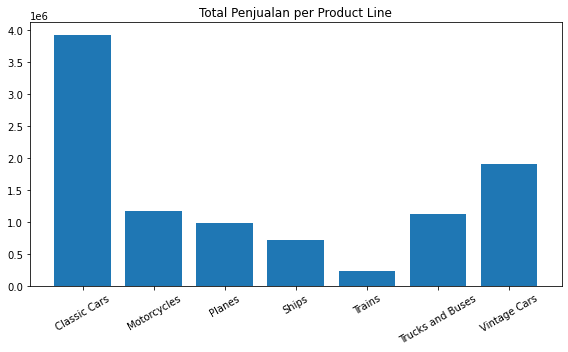

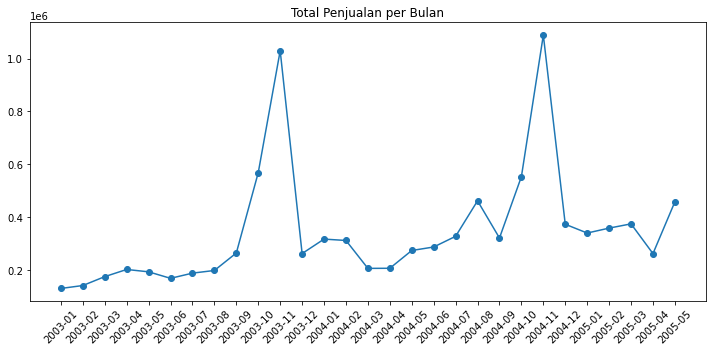

In [2]:
#1. Load Data
df = pd.read_csv("sales_data_sample.csv")

#2. Clean Data
df = df.drop_duplicates()
df = df.dropna(subset=["SALES", "ORDERDATE"])
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])
df["ADDRESSLINE2"] = df["ADDRESSLINE2"].fillna("N/A")
df["STATE"] = df["STATE"].fillna("Unknown")
df["POSTALCODE"] = df["POSTALCODE"].fillna("00000")
df["TERRITORY"] = df["TERRITORY"].fillna("Unknown")

#3. Analisis
sales_per_productline = df.groupby("PRODUCTLINE")["SALES"].sum().reset_index()
df["BULAN"] = df["ORDERDATE"].dt.to_period("M")
sales_per_bulan = df.groupby("BULAN")["SALES"].sum().reset_index()
top_products = df.groupby("PRODUCTCODE")["SALES"].sum().nlargest(5).reset_index()

#4. Visualisasi
plt.figure(figsize=(8,5))
plt.bar(sales_per_productline["PRODUCTLINE"].to_numpy(), sales_per_productline["SALES"].to_numpy())
plt.title("Total Penjualan per Product Line")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("sales_per_productline.png")

plt.figure(figsize=(10,5))
plt.plot(sales_per_bulan["BULAN"].astype(str).to_numpy(), sales_per_bulan["SALES"].to_numpy(), marker="o")
plt.title("Total Penjualan per Bulan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_per_bulan.png")

#5. Simpan Laporan
os.makedirs("laporan", exist_ok=True)
with pd.ExcelWriter("Laporan_Penjualan.xlsx") as writer:
    sales_per_productline.to_excel(writer, sheet_name="Per Productline", index=False)
    sales_per_bulan.to_excel(writer, sheet_name="Per Bulan", index=False)
    top_products.to_excel(writer, sheet_name="Top Produk", index=False)